# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | yutan
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | copiapo
Processing Record 6 of Set 1 | necochea
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | papatowai
Processing Record 9 of Set 1 | tura
Processing Record 10 of Set 1 | kapuskasing
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | tchintabaraden
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | kwang binh
Processing Record 15 of Set 1 | beloyarskiy
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | nayoro
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | osmancik
Processing Record 21 of Set 1 | tobi village
City not found. Skipping...
Processing Record 22 of Se

Processing Record 34 of Set 4 | at taj
Processing Record 35 of Set 4 | invercargill
Processing Record 36 of Set 4 | port mathurin
Processing Record 37 of Set 4 | aasiaat
Processing Record 38 of Set 4 | saipan
Processing Record 39 of Set 4 | tazovsky
Processing Record 40 of Set 4 | nikolayevsk-on-amure
Processing Record 41 of Set 4 | calatayud
Processing Record 42 of Set 4 | kyren
Processing Record 43 of Set 4 | bei'an
Processing Record 44 of Set 4 | kasongo-lunda
Processing Record 45 of Set 4 | camayenne
Processing Record 46 of Set 4 | novyy urengoy
Processing Record 47 of Set 4 | guantanamo
Processing Record 48 of Set 4 | egersund
Processing Record 49 of Set 4 | la'ie
Processing Record 0 of Set 5 | dolores
Processing Record 1 of Set 5 | isabela
Processing Record 2 of Set 5 | zyryanovsk
Processing Record 3 of Set 5 | oranjemund
Processing Record 4 of Set 5 | port saint john's
Processing Record 5 of Set 5 | tual
Processing Record 6 of Set 5 | keflavik
Processing Record 7 of Set 5 | port

Processing Record 26 of Set 8 | zhanaozen
Processing Record 27 of Set 8 | nizhneudinsk
Processing Record 28 of Set 8 | basni
Processing Record 29 of Set 8 | puerto san carlos
City not found. Skipping...
Processing Record 30 of Set 8 | champerico
Processing Record 31 of Set 8 | ilebo
Processing Record 32 of Set 8 | st. john's
Processing Record 33 of Set 8 | kingston
Processing Record 34 of Set 8 | santa cruz
Processing Record 35 of Set 8 | piti village
Processing Record 36 of Set 8 | pandan
Processing Record 37 of Set 8 | palmeiras de goias
Processing Record 38 of Set 8 | gamba
Processing Record 39 of Set 8 | sangkhla buri
Processing Record 40 of Set 8 | namibe
Processing Record 41 of Set 8 | pucheng
Processing Record 42 of Set 8 | nusaybin
Processing Record 43 of Set 8 | bad salzuflen
Processing Record 44 of Set 8 | termas de rio hondo
Processing Record 45 of Set 8 | vryburg
Processing Record 46 of Set 8 | dock junction
Processing Record 47 of Set 8 | ifrane
Processing Record 48 of Set

Processing Record 12 of Set 12 | bardai
Processing Record 13 of Set 12 | kamaishi
Processing Record 14 of Set 12 | ratnagiri
Processing Record 15 of Set 12 | sungai penuh
Processing Record 16 of Set 12 | paracatu
Processing Record 17 of Set 12 | bawali
Processing Record 18 of Set 12 | lompoc
Processing Record 19 of Set 12 | london
Processing Record 20 of Set 12 | kabinda
Processing Record 21 of Set 12 | lora del rio
Processing Record 22 of Set 12 | giyani
Processing Record 23 of Set 12 | jaynagar
Processing Record 24 of Set 12 | chizhou
Processing Record 25 of Set 12 | kill devil hills
Processing Record 26 of Set 12 | antsiranana
Processing Record 27 of Set 12 | kuusamo
Processing Record 28 of Set 12 | kutum
Processing Record 29 of Set 12 | omutinskiy
Processing Record 30 of Set 12 | roma
Processing Record 31 of Set 12 | luziania
Processing Record 32 of Set 12 | labytnangi
Processing Record 33 of Set 12 | san ignacio
Processing Record 34 of Set 12 | borogontsy
Processing Record 35 of S

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,285.46,68,7,1.94,SH,1697489198
1,jamestown,42.0970,-79.2353,283.92,92,100,4.63,US,1697489034
2,yutan,28.2500,112.5500,290.51,55,0,1.12,CN,1697489284
3,adamstown,-25.0660,-130.1015,294.82,83,60,4.11,PN,1697489285
4,copiapo,-27.3667,-70.3333,289.98,35,100,2.84,CL,1697489278


In [6]:
#Convert Dates to a readable format
city_data_df["Date"] = (pd.to_datetime(city_data_df["Date"],unit="s")).dt.date
city_data_df["Max Temp"] = (city_data_df["Max Temp"] - 273.15)

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,12.31,68,7,1.94,SH,2023-10-16
1,jamestown,42.0970,-79.2353,10.77,92,100,4.63,US,2023-10-16
2,yutan,28.2500,112.5500,17.36,55,0,1.12,CN,2023-10-16
3,adamstown,-25.0660,-130.1015,21.67,83,60,4.11,PN,2023-10-16
4,copiapo,-27.3667,-70.3333,16.83,35,100,2.84,CL,2023-10-16


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,12.31,68,7,1.94,SH,2023-10-16
1,jamestown,42.0970,-79.2353,10.77,92,100,4.63,US,2023-10-16
2,yutan,28.2500,112.5500,17.36,55,0,1.12,CN,2023-10-16
3,adamstown,-25.0660,-130.1015,21.67,83,60,4.11,PN,2023-10-16
4,copiapo,-27.3667,-70.3333,16.83,35,100,2.84,CL,2023-10-16


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

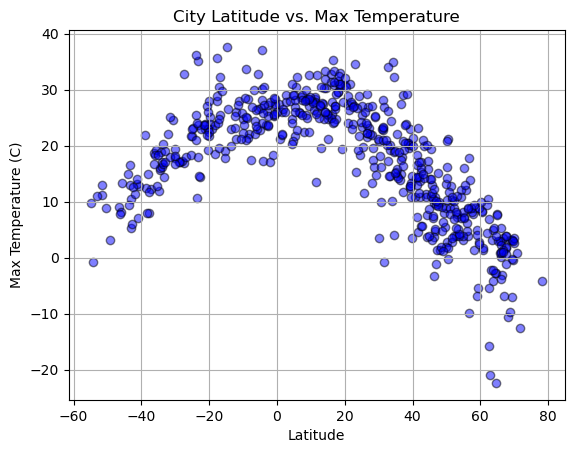

In [9]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]
plt.scatter(latitude, temperature, marker="o", facecolor="blue", edgecolor="black", alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()


# Save the figure
plt.savefig("Lat_vs_Temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

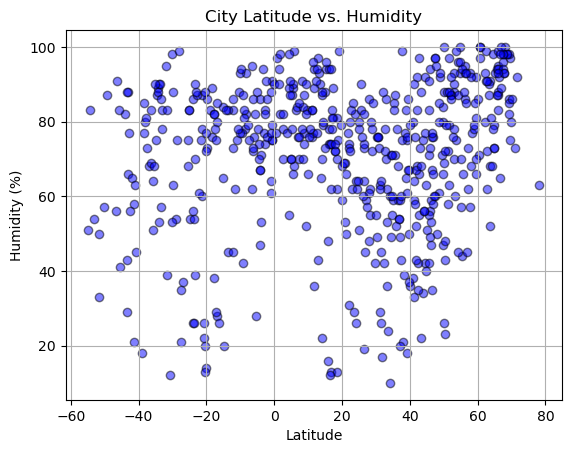

In [10]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df["Lat"]
humidity = city_data_df["Humidity"]
plt.scatter(latitude, humidity, marker="o", facecolor="blue", edgecolor="black", alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("Lat_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

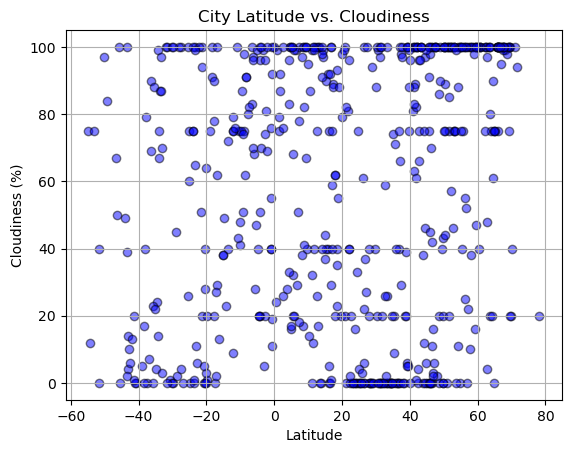

In [11]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]
plt.scatter(latitude, cloudiness, marker="o", facecolor="blue", edgecolor="black", alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("Lat_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

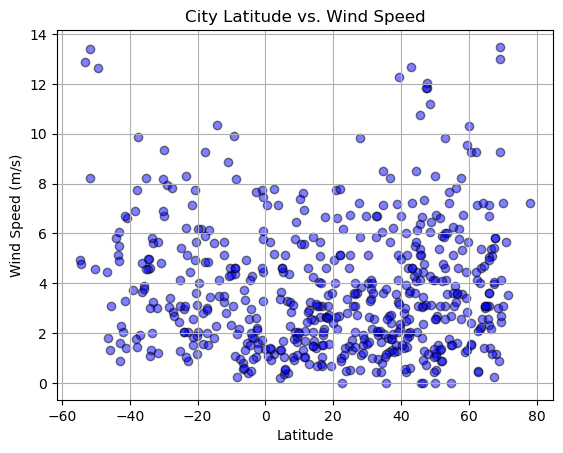

In [12]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]
plt.scatter(latitude, wind_speed, marker="o", facecolor="blue", edgecolor="black", alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("Lat_vs_Wind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0] 

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jamestown,42.0970,-79.2353,10.77,92,100,4.63,US,2023-10-16
2,yutan,28.2500,112.5500,17.36,55,0,1.12,CN,2023-10-16
8,tura,25.5198,90.2201,19.85,90,0,1.71,IN,2023-10-16
9,kapuskasing,49.4169,-82.4331,8.05,71,40,4.12,CA,2023-10-16
11,tchintabaraden,15.8969,5.7985,32.76,16,92,4.03,NE,2023-10-16


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0] 

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,12.31,68,7,1.94,SH,2023-10-16
3,adamstown,-25.0660,-130.1015,21.67,83,60,4.11,PN,2023-10-16
4,copiapo,-27.3667,-70.3333,16.83,35,100,2.84,CL,2023-10-16
5,necochea,-38.5473,-58.7368,12.39,85,17,6.88,AR,2023-10-16
6,avarua,-21.2078,-159.7750,23.03,60,20,2.57,CK,2023-10-16


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8521538360480516


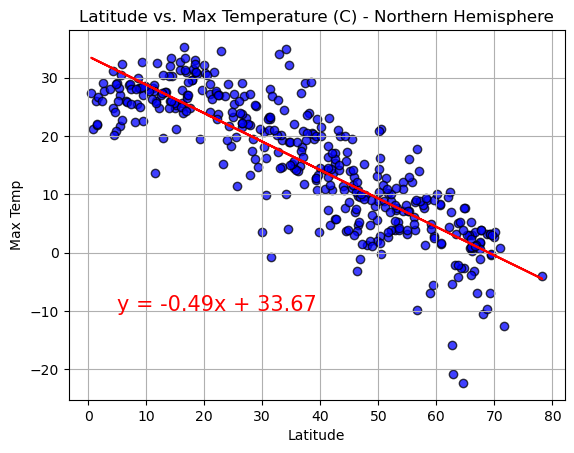

In [15]:
# Linear regression on Northern Hemisphere
x_north = northern_hemi_df["Lat"]
y_north = northern_hemi_df["Max Temp"]

plt.scatter(x_north, y_north, marker="o", facecolor="blue", edgecolor="black", alpha=0.75)
plt.title("Latitude vs. Max Temperature (C) - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(5,-10),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.7504767709773348


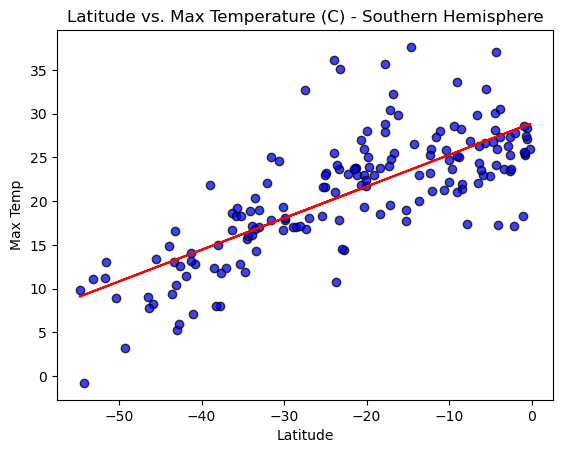

In [16]:
# Linear regression on Southern Hemisphere
x_south = southern_hemi_df["Lat"]
y_south = southern_hemi_df["Max Temp"]

plt.scatter(x_south, y_south, marker="o", facecolor="blue", edgecolor="black", alpha=0.75)
plt.title("Latitude vs. Max Temperature (C) - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, y_south)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(5,35),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")


plt.show()

There is a strong correlation between the temperature and the latitude. 
The closer to the equator the higher the temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.12873229045515555


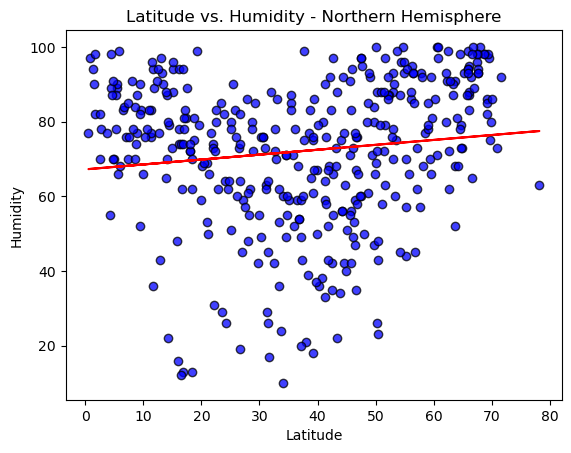

In [17]:
# Northern Hemisphere
x_north = northern_hemi_df["Lat"]
y_north = northern_hemi_df["Humidity"]

plt.scatter(x_north, y_north, marker="o", facecolor="blue", edgecolor="black", alpha=0.75)
plt.title("Latitude vs. Humidity - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(5,-10),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.18258169765482213


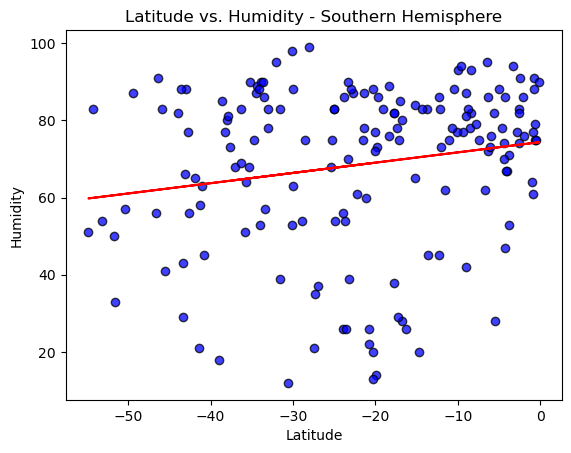

In [18]:
# Southern Hemisphere
x_south = southern_hemi_df["Lat"]
y_south = southern_hemi_df["Humidity"]

plt.scatter(x_south, y_south, marker="o", facecolor="blue", edgecolor="black", alpha=0.75)
plt.title("Latitude vs. Humidity - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, y_south)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(5,35),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

plt.show()

There is little to no correlation between humidity and the distance from the equator for both the northern and southern hemisphere. For the Northern Hemisphere there is a slight positive correlation but it is not very strong. Similarly, for the Sorthern Hemisphere there is a slight positive correlation but it is not very strong.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.19432321619206042


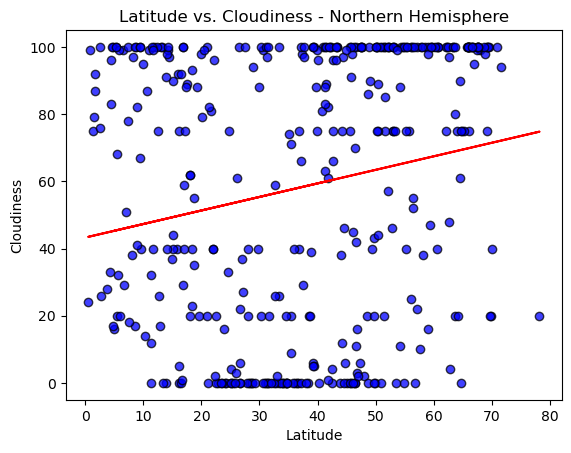

In [19]:
# Northern Hemisphere
x_north = northern_hemi_df["Lat"]
y_north = northern_hemi_df["Cloudiness"]

plt.scatter(x_north, y_north, marker="o", facecolor="blue", edgecolor="black", alpha=0.75)
plt.title("Latitude vs. Cloudiness - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(5,-10),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.2580601888552945


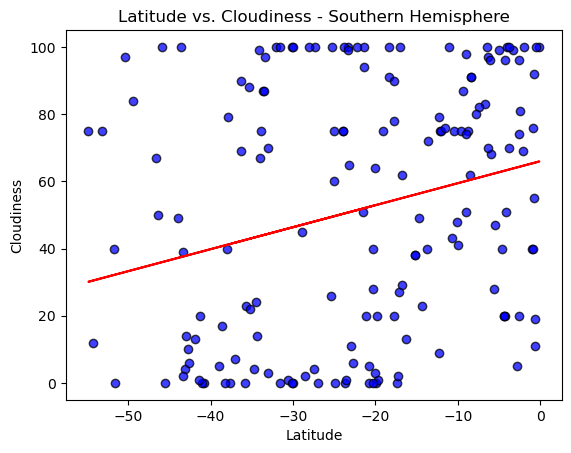

In [20]:
# Southern Hemisphere
x_south = southern_hemi_df["Lat"]
y_south = southern_hemi_df["Cloudiness"]

plt.scatter(x_south, y_south, marker="o", facecolor="blue", edgecolor="black", alpha=0.75)
plt.title("Latitude vs. Cloudiness - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, y_south)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(5,35),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

plt.show()

There is very weak correlation between cloudiness and the distance from the equator for both the northern and southern hemisphere. For both Hemispheres there is a slight positive correlation but it is not very strong.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.2103359234860537


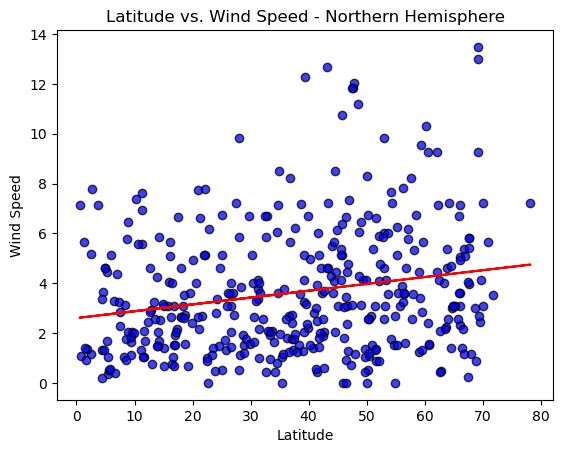

In [21]:
# Northern Hemisphere
x_north = northern_hemi_df["Lat"]
y_north = northern_hemi_df["Wind Speed"]

plt.scatter(x_north, y_north, marker="o", facecolor="blue", edgecolor="black", alpha=0.75)
plt.title("Latitude vs. Wind Speed - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(5,-10),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: -0.27292340227437795


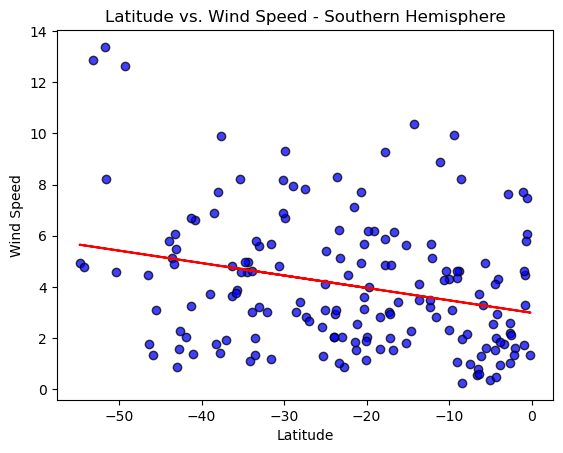

In [22]:
# Southern Hemisphere
x_south = southern_hemi_df["Lat"]
y_south = southern_hemi_df["Wind Speed"]

plt.scatter(x_south, y_south, marker="o", facecolor="blue", edgecolor="black", alpha=0.75)
plt.title("Latitude vs. Wind Speed - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, y_south)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(5,35),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

plt.show()

In [ ]:
The Northern Hemisphere has a slight positive coorelation but not very strong.
The Southern Hemisphere has a slight negative coorelation but not very strong.
The closer the location is to the equator the wind speed is slightly lower.